In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 285.6 KB


In [4]:
data_info = {}

In [5]:
data.drop("PassengerId", axis=1, inplace=True)

In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
data["Survived"] = data["Survived"].astype("int8")

In [9]:
data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
data_info["pclass"] = data.Pclass.value_counts()

In [11]:
data["Pclass"] = data["Pclass"].astype("int8")

In [12]:
data.drop("Name", axis=1, inplace=True)

In [13]:
data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
data_info["sex"] = data.Sex.value_counts()

In [15]:
data["Sex"] = (data["Sex"] == "male").astype("int8")

In [16]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

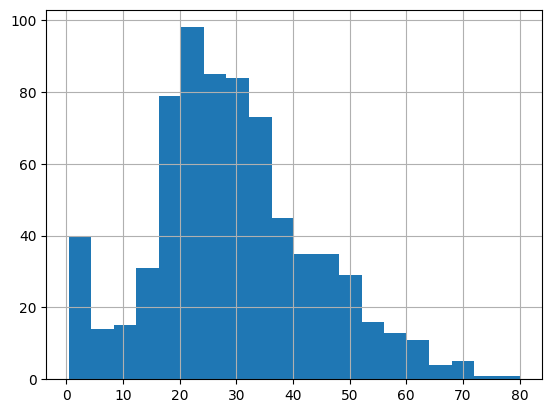

In [17]:
data["Age"].hist(bins=20);

In [18]:
age_med = data["Age"].median()
age_med

np.float64(28.0)

In [19]:
data_info["age_median"] = age_med

In [20]:
data["Age"] = data["Age"].fillna(age_med).astype("int8")

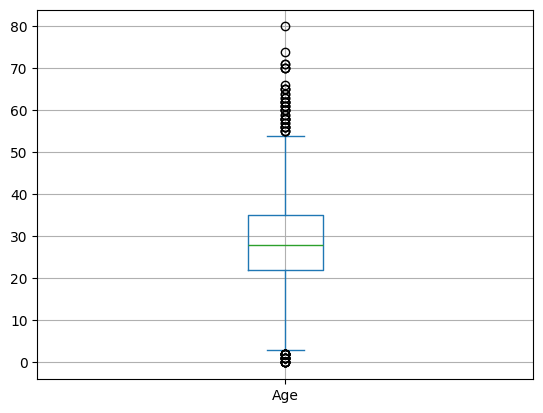

In [21]:
data.Age.plot.box()
plt.grid()

In [22]:
data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [23]:
data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [24]:
data_info["SibSp"] = data.SibSp.value_counts()
data_info["Parch"] = data.Parch.value_counts()

In [25]:
data["SibSp"] = data["SibSp"].astype("int8")
data["Parch"] = data["Parch"].astype("int8")

In [26]:
data.drop(["Ticket", "Cabin"], axis=1, inplace=True)

In [27]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

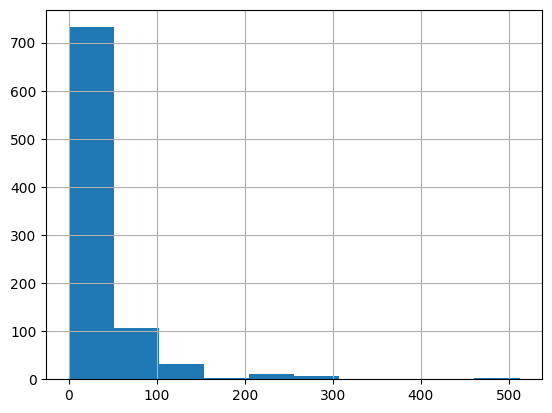

In [28]:
data.Fare.hist()

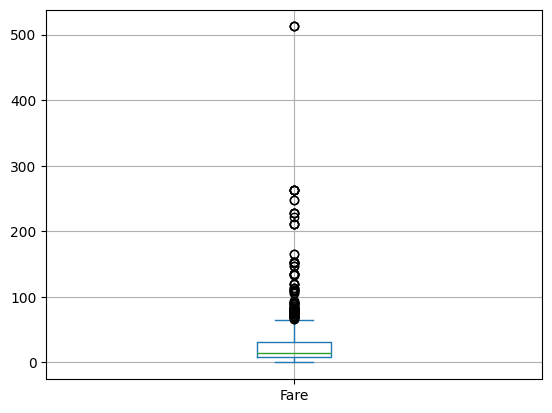

In [29]:
data.Fare.plot.box()
plt.grid()

<Axes: >

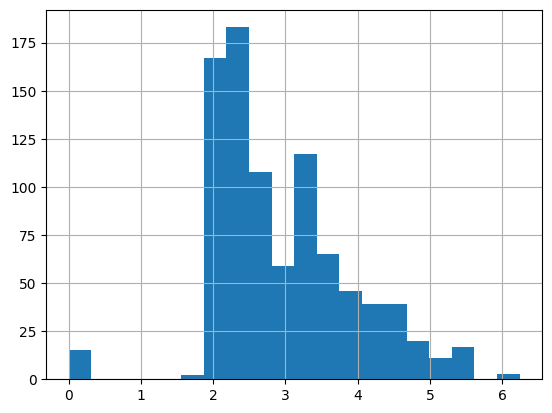

In [30]:
np.log(data.Fare + 1).hist(bins=20)

In [31]:
data["Fare"] = np.log(data.Fare + 1).astype("float32")

In [32]:
data["Embarked"].isna().sum()

np.int64(2)

In [33]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
data_info["Embarked"] = data.Embarked.value_counts()

In [35]:
data["Embarked"] = data.Embarked.fillna("S")

In [36]:
# pd.get_dummies(data, columns=["Embarked"], dtype="int8")

In [37]:
d = data["Embarked"].value_counts()
d

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [38]:
for k in d.keys():
    data["Embarked_" + k] = (data["Embarked"] == k).astype("int8")
data.drop("Embarked", axis=1, inplace=True)

In [39]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,0,3,1,22,1,0,2.110213,1,0,0
1,1,1,0,38,1,0,4.280593,0,1,0
2,1,3,0,26,0,0,2.188856,1,0,0
3,1,1,0,35,1,0,3.990834,1,0,0
4,0,3,1,35,0,0,2.202765,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,2.639057,1,0,0
887,1,1,0,19,0,0,3.433987,1,0,0
888,0,3,0,28,1,2,3.196630,1,0,0
889,1,1,1,26,0,0,3.433987,0,1,0


In [40]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int8   
 1   Pclass      891 non-null    int8   
 2   Sex         891 non-null    int8   
 3   Age         891 non-null    int8   
 4   SibSp       891 non-null    int8   
 5   Parch       891 non-null    int8   
 6   Fare        891 non-null    float32
 7   Embarked_S  891 non-null    int8   
 8   Embarked_C  891 non-null    int8   
 9   Embarked_Q  891 non-null    int8   
dtypes: float32(1), int8(9)
memory usage: 11.4 KB
